### Fractal Brownian Motion

In [21]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import time

In [22]:
# Settings
pixels = 100
rotation = 0.0
light_origin = (0.39, 0.39)
time_speed = 0.2
dither_size = 2.0
should_dither = True
light_border_1 = 0.4
light_border_2 = 0.5
river_cutoff = 0.1

colors = [(0.639216, 0.654902, 0.760784, 1),
          (0.298039, 0.407843, 0.521569, 1),
          (0.227451, 0.247059, 0.368627, 1),
          (0.639216, 0.654902, 0.760784, 1),
          (0.298039, 0.407843, 0.521569, 1),
          (0.227451, 0.247059, 0.368627, 1)]

size = 5
OCTAVES = 4
seed = 1
time_ = 0.0

In [23]:
# Function to get random number
def rand(coord):
    # Wrap around coordinates within width (2*size) and height (size)
    coord = np.mod(coord, np.array([2.0, 1.0]) * np.round(size))

    # Psuedo-random number generator
    value = np.mod(np.sin(np.dot(coord, np.array([12.9898, 78.233]))) * 15.5453 * seed, 1)

    # Return random number     
    return value

# Function to get noise
def noise(coord):
    # Get integer and fractional part of coordinate
    i = np.floor(coord)
    f = np.mod(coord, 1)

    # Get random numbers for 4 corners of cell
    a = rand(i)
    b = rand(i + np.array([1.0, 0.0]))
    c = rand(i + np.array([0.0, 1.0]))
    d = rand(i + np.array([1.0, 1.0]))
    
    # Interpolate random numbers
    cubic = f * f * (3.0 - 2.0 * f)

    # Return interpolated value
    value = a + (b - a) * cubic[0] + (c - a) * cubic[1] * (1.0 - cubic[0]) + (d - b) * cubic[0] * cubic[1]

    # Return value
    return value

# Function to get fractal Brownian motion
def fractal_brownian_motion(coord):
    # Initialize value and scale
    value = 0.0
    scale = 0.5

    # Loop through octaves
    for i in range(OCTAVES):
        # Add noise to value
        value += noise(coord) * scale

        # Update coordinate and scale for next octave
        coord *= 2.0
        scale *= 0.5
    
    # Return value
    return value

In [24]:
def rand2(xG, yG):
    # Wrap around coordinates within width (2*size) and height (size)
    xG = np.mod(xG, 2.0 * size)
    yG = np.mod(yG, size)

    # Psuedo-random number generator
    randG = np.mod(np.sin(np.dot(np.dstack((xG, yG)), np.array([12.9898, 78.233]))) * 15.5453 * seed, 1)
    
    # Return random numbers
    return randG

def noise2(xG, yG):
    # Get integer and fractional part of coordinate
    iG = np.floor(xG)
    jG = np.floor(yG)
    fG = np.mod(xG, 1)
    gG = np.mod(yG, 1)

    # Get random numbers for 4 corners of cell
    aG = rand2(iG, jG)
    bG = rand2(iG + 1, jG)
    cG = rand2(iG, jG + 1)
    dG = rand2(iG + 1, jG + 1)
    
    # Interpolate random numbers
    cubic_xG = fG * fG * (3.0 - 2.0 * fG)
    cubic_yG = gG * gG * (3.0 - 2.0 * gG)

    # Return interpolated value
    noiseG = aG + (bG - aG) * cubic_xG + (cG - aG) * cubic_yG * (1.0 - cubic_xG) + (dG - bG) * cubic_xG * cubic_yG

    # Return value
    return noiseG

def fractal_brownian_motion2(xG, yG):
    # Initialize value and scale
    fmbG = np.zeros_like(xG)
    scale = 0.5

    # Loop through octaves
    for i in range(OCTAVES):
        # Add noise to value
        fmbG += noise2(xG, yG) * scale

        # Update coordinate and scale for next octave
        xG *= 2.0
        yG *= 2.0
        scale *= 0.5
    
    # Return value
    return fmbG

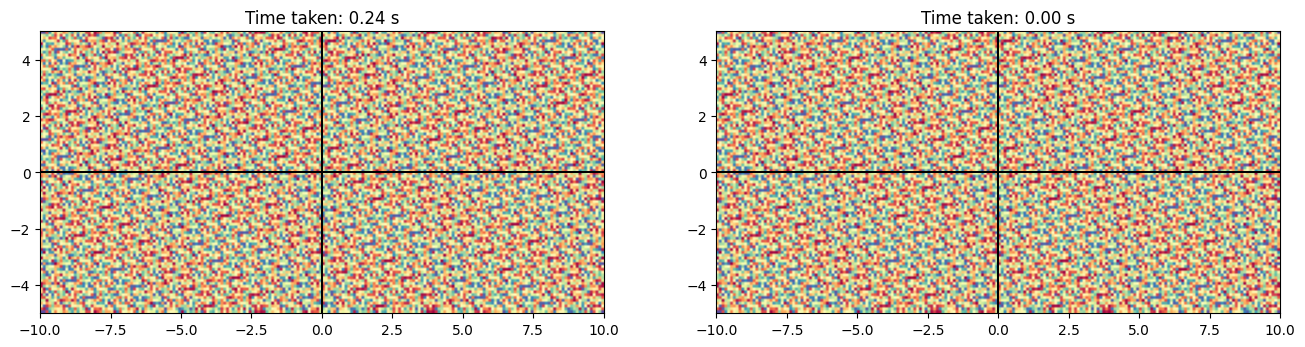

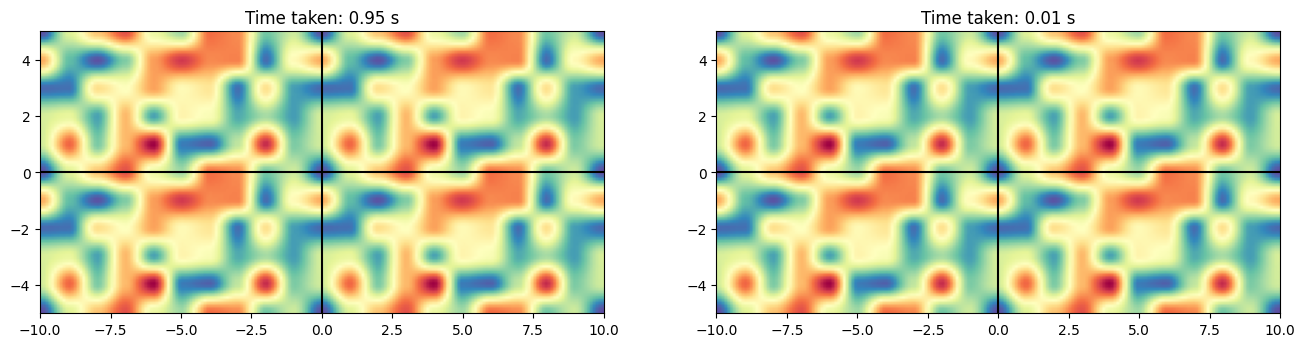

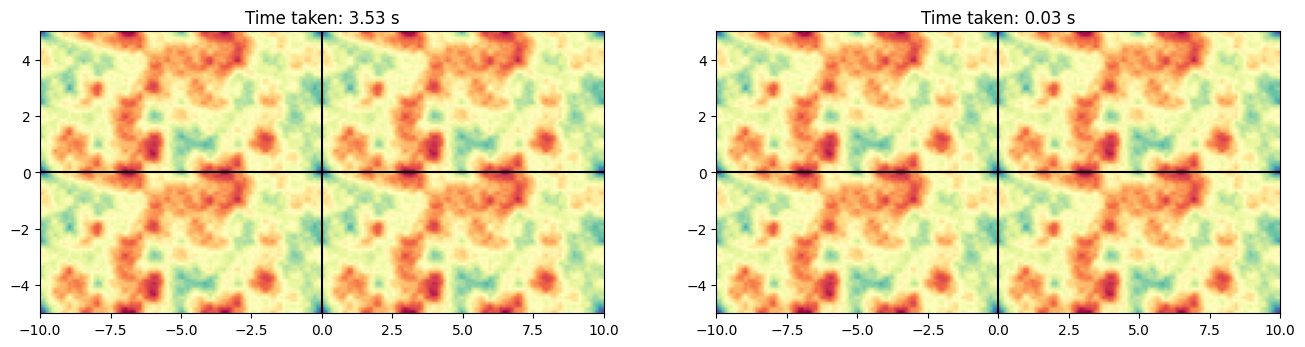

In [ ]:
# Coordinates
xs = np.linspace(-size*2, size*2, pixels*2)
ys = np.linspace(-size, size, pixels)
xG, yG = np.meshgrid(xs, ys)

# Compare random number generation
t1 = time.time()
randG1 =np.zeros_like(xG)
for i in range(len(ys)):
    for j in range(len(xs)):
        randG1[i, j] = rand(np.array((xs[j], ys[i])))
t2 = time.time()
randG2 = rand2(xG, yG)
t3 = time.time()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(randG1, cmap='Spectral_r', extent=(xs[0], xs[-1], ys[0], ys[-1]))
axs[1].imshow(randG2, cmap='Spectral_r', extent=(xs[0], xs[-1], ys[0], ys[-1]))
for ax in axs:
    ax.hlines(0, xs[0], xs[-1], color='black')
    ax.vlines(0, ys[0], ys[-1], color='black')
axs[0].set_title(f'Time taken: {t2-t1:.2f} s')
axs[1].set_title(f'Time taken: {t3-t2:.2f} s')
plt.show()

# Compare noise generation
t1 = time.time()
noiseG1 = np.zeros_like(xG)
for i in range(len(ys)):
    for j in range(len(xs)):
        noiseG1[i, j] = noise(np.array((xs[j], ys[i])))
t2 = time.time()
noiseG2 = noise2(xG, yG)
t3 = time.time()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(noiseG1, cmap='Spectral_r', extent=(xs[0], xs[-1], ys[0], ys[-1]))
axs[1].imshow(noiseG2, cmap='Spectral_r', extent=(xs[0], xs[-1], ys[0], ys[-1]))
for ax in axs:
    ax.hlines(0, xs[0], xs[-1], color='black')
    ax.vlines(0, ys[0], ys[-1], color='black')
axs[0].set_title(f'Time taken: {t2-t1:.2f} s')
axs[1].set_title(f'Time taken: {t3-t2:.2f} s')
plt.show()

# Compare fractal Brownian motion generation
t1 = time.time()
fbmG1 = np.zeros_like(xG)
for i in range(len(ys)):
    for j in range(len(xs)):
        fbmG1[i, j] = fractal_brownian_motion(np.array((xs[j], ys[i])))
t2 = time.time()
fbmG2 = fractal_brownian_motion2(xG, yG)
t3 = time.time()

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(fbmG1, cmap='Spectral_r', extent=(xs[0], xs[-1], ys[0], ys[-1]))
axs[1].imshow(fbmG2, cmap='Spectral_r', extent=(xs[0], xs[-1], ys[0], ys[-1]))
for ax in axs:
    ax.hlines(0, xs[0], xs[-1], color='black')
    ax.vlines(0, ys[0], ys[-1], color='black')
axs[0].set_title(f'Time taken: {t2-t1:.2f} s')
axs[1].set_title(f'Time taken: {t3-t2:.2f} s')
plt.show()

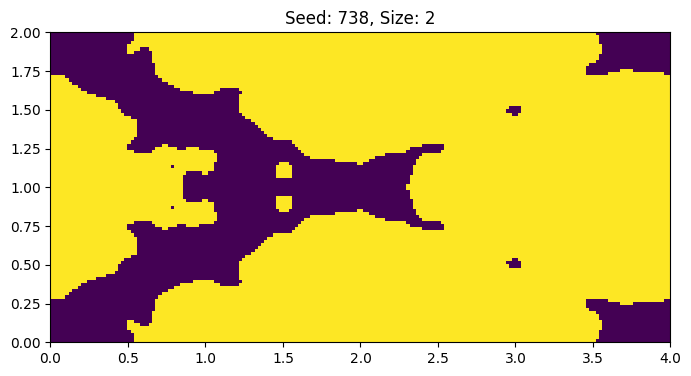

In [199]:
# Coordinates
size = 2
xs = np.linspace(0, size*2, pixels*2)
ys = np.linspace(0, size, pixels)
xG, yG = np.meshgrid(xs, ys)

# Generate fractal Brownian motion
fbmG = fractal_brownian_motion2(xG, yG)
fbmG = np.interp(fbmG, (fbmG.min(), fbmG.max()), (0, 1))

# Plot fractal Brownian motion
seed = np.random.randint(0, 1000)

plt.figure(figsize=(8, 8))
plt.imshow(fbmG > 0.5, extent=(xs[0], xs[-1], ys[0], ys[-1]))
plt.title(f'Seed: {seed}, Size: {size}')
plt.show()